# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework 9

## Rui Fang $\quad$ Collaborator: /

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, April 7th, 2018 at 10:59am

**Instructions:**

- Upload your final answers as an iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

This Homework is a continuation of Problem #1 from Homework 8.

Your answers to Problem #1 from HW8 should  give you a idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model in this Homework, which is much more technically involved.


## Problem #1: Modeling Your Understanding

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone built for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to Part A and B:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.

II. Relevant (possibly) to Extra Credit:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":

<img src='restaurant_model.pdf'>


***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*

### Part A: Modeling

When the value in "count" is low, the "mean" value can be very skewed.

Following the [SAT prep school example discussed in lab](https://am207.github.io/2018spring/wiki/gelmanschoolstheory.html) (and using your answers for HW 8 Problem #1), set up a Bayesian model(that is, write functions encapsulating the pymc3 code) for a reviewer $j$'s opinion of restaurant $k$'s food and service, separately. That is, you will have a model for each restaurant and each aspect (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** what quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?

***

### *Solution*

For restaurant $k$ and the food aspect, we have model 
$$\mu \sim \mathcal{N}(0,5)$$
$$\tau \sim \text{Half-Cauchy}(0,5)$$
$$\theta_{jk}^{\text{food}} \sim \mathcal{N}(\mu,\tau)$$
$$\hat{y}_{jk}^{\text{food}} \sim \mathcal{N}(\theta_{jk}^{\text{food}},\sigma_{jk}^{\text{food}})$$
where $j \in 1, ..., J$ corresponds to different reviews, $\hat{y}_{jk}^{\text{food}}$ is the given "mean" data, $\sigma_{jk}^{\text{food}}$ is the standard error of the sample mean, and so is given by $\sqrt{\frac{\text{"var"}}{\text{"count"}}}$.

Similarly, for restaurant $k$ and the service aspect, we have model 
$$\mu \sim \mathcal{N}(0,5)$$
$$\tau \sim \text{Half-Cauchy}(0,5)$$
$$\theta_{jk}^{\text{service}} \sim \mathcal{N}(\mu,\tau)$$
$$\hat{y}_{jk}^{\text{service}} \sim \mathcal{N}(\theta_{jk}^{\text{service}},\sigma_{jk}^{\text{service}})$$
where $j \in 1, ..., J$ corresponds to different reviews, $\hat{y}_{jk}^{\text{service}}$ is the given "mean" data, $\sigma_{jk}^{\text{service}}$ is the standard error of the sample mean, and so is given by $\sqrt{\frac{\text{"var"}}{\text{"count"}}}$.

***

### Part B: Analysis for Each restaurant

Use your model to produce estimates for $\theta_{jk}$'s. Pick a few restaurants, for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant). 

For the same restaurants, for each aspect, generate shrinkage plots and probability shrinkage plots as follows:

**Shrinkage plot for a restaurant, topic**:

The aim for this plot is to see the shrinkage from sample means (error bars generated from standard error) to $\theta_{jk}$'s (error bars generated from theta variance).  

The sample means of reviews are plotted at $y=0$ and the posterior means ($\theta_{ik}$) are plotted at $y=1$. For each review connect the sample mean to the posterior mean with a line.  Show error bars on the sample mean points using standard error and on the ($\theta_{jk}$) points using variance.

**Probability Shrinkage plot for a restaurant, topic**:

The aim for this plot is to see the shrinkage from the classification probabilities from the sample means of reviews to the classification probabilities of $\theta_{jk}$'s.  The classification probabilities are calculated from the gaussian at the given mean and variance. The sample means and standard error are fed into the gaussian to generate one set of classification probabilities.  The $\theta_{jk}$ estimates and variances are fed into the gaussian to generate the other set of variances.

The y values are the classification probability (calculated as 1-cdf) using the normal distribution at a given mean and variance.

The sample means of reviews are plotted with $y$'s obtained by using the sample means as the means in the normal above, with line segments (error bars) representing the standard error. 

The posterior means ($\theta_{jk}$) are plotted with $y$'s obtained using the posterior means (thetas) in the gaussian above, and variances on the thetas with line segments (error bars) representing the variances on the $\theta_{jk}$'s.

We've provided you some code to generate a shrinkage plot and a probability shrinkage plot is included in this notebook, but feel free to implement your own. The code should also help elucidate the text above.

Use these plots to discuss the statistical benefits of modeling each reviewer's opinion using your model from Part A, rather than approximating the reviewer opinion with the value in "mean".

Example of a shrinkage plot:
<img src="shrinkage.png">

Example of a probability shrinkage plot:
<img src="shrinkage_prob.png">

***

### *Solution*

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pymc3 as pm
import copy 
import itertools
from scipy.special import erf

sns.set()

In [2]:
# Load in data 
df = pd.read_csv('reviews_processed.csv')
df.head()

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
4,--2NT40xmHh9oBLumzdjhA,0,4ZZab5hinFzHtj3sE8vQWg,5,0.764218,0.601008,0.337710,2,4.181818,0.026742


In [6]:
# Obtain list of restaurants with count=1
rid_with_countone = df[df['count']==1]['rid'].unique() 

# Ignore restaturants with count=1, only consider restaurants with reviews with multiple counts 
new_df = copy.deepcopy(df[~df['rid'].isin(rid_with_countone)])
# new_df.sort_values(by=['rid', 'topic', 'count'])

In [7]:
# Add theta and theta_var columns
new_df['theta'] = 0
new_df['theta_var'] = 0

new_df.head()

,review_id,topic,rid,count,max,mean,min,stars,uavg,var,theta,theta_var
174,-3UkoGwG_RBQhrd6v81BXQ,1,qXOAl1zrwUufSGlUWGvA2A,4,0.889182,0.778683,0.646423,4,4.000000,0.010187,0,0
202,-4MxS0uHIlm1Z6KkQizGPg,0,EJkiV-vOO2NfQH71KeqaXw,9,0.621870,0.514723,0.333433,1,2.666667,0.012613,0,0
203,-4MxS0uHIlm1Z6KkQizGPg,1,EJkiV-vOO2NfQH71KeqaXw,5,0.688211,0.527276,0.090070,1,2.666667,0.060906,0,0
233,-5DptcAJGRlqLUXGREEnaw,0,jhzF9VLnT7FZpvwPXSpApw,13,0.764218,0.631652,0.395785,3,3.540541,0.008839,0,0
234,-5DptcAJGRlqLUXGREEnaw,1,jhzF9VLnT7FZpvwPXSpApw,7,0.707597,0.460480,0.210742,3,3.540541,0.029435,0,0


In [12]:
# Sample thetas for each topic for a restaurant, 
# save thetas and theta_vars in the dataframe, 
# generate theta vs mean plot and shrinkage plots
def model_restaurant(rid):
    
    for topic in [0, 1]:
        
        temp_df = new_df.loc[(new_df['rid'] == rid) & (new_df['topic'] == topic)]
        means = temp_df['mean'].values
        mean_vars = temp_df['var'].values
        counts = temp_df['count'].values
        
        thetas, theta_vars = sample_thetas(means, mean_vars, counts)
        
        new_df.loc[(new_df['rid'] == rid) & (new_df['topic'] == topic), 'theta'] = thetas
        new_df.loc[(new_df['rid'] == rid) & (new_df['topic'] == topic), 'theta_var'] = theta_vars 
        
        print('For restaurant %s, topic %s: ' % (rid, topic))
        
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.plot(means, thetas, '.')
        plt.xlabel(r'$\hat{y}_j$')
        plt.ylabel(r'$\theta_j$')
        plt.title('theta vs mean')
        plt.subplot(132)
        shrinkage_plot(means, thetas, mean_vars, theta_vars, counts)
        plt.subplot(133)
        prob_shrinkage_plot(means, thetas, mean_vars, theta_vars, counts)
        plt.tight_layout()
        plt.show()


# Sample thetas using the model from part A (code is adapted from lab 9)        
def sample_thetas(means, mean_vars, counts):

    y = means
    sigma = np.sqrt(mean_vars / counts)

    with pm.Model() as model:

        mu = pm.Normal('mu', 0, sd=5)
        tau = pm.HalfCauchy('tau', beta=5)
        theta = pm.Normal('theta', mu=mu, sd=tau, shape=y.shape[0])
        obs = pm.Normal('obs', mu=theta, sd=sigma, observed=y)

        trace = pm.sample(5000, init=None, njobs=2, tune=500)
    
    thetas = np.mean(trace['theta'], axis=0)
    theta_vars = np.var(trace['theta'], axis=0)
    
    return thetas, theta_vars 


# Use 1-cdf at 0.5 to model the probability of having positive sentiment
# it basically tells you the area under the gaussian after 0.5 (we'll assume 
# positive sentiment based on the usual probability > 0.5 criterion)

prob = lambda mu, vari: .5 * (1 - erf((0.5- mu) / np.sqrt(2 * vari)))

# fix a restaurant and an aspect (food or service)
# "means" is the array of values in the "mean" column for the restaurant and the aspect 
#         in the dataset
# "thetas" is the array of values representing your estimate of the opinions of reviewers 
#          regarding this aspect of this particular restaurant
# "theta_vars" is the array of values of the varaiances of the thetas
# "counts" is the array of values in the "count" column for the restaurant and the aspect 
#.         in the dataset
# FEEL FREE TO RE-IMPLEMENT THESE

def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    """
    a plot that shows how review means (plotted at y=0) shrink to
    review $theta$s, plotted at y=1
    """
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)   
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m, t, me, te, c in data: # mean, theta, mean errir, theta error, count
            color = next(palette)
            # add some jitter to y values to separate them
            noise = 0.04 * np.random.randn()
            noise2 = 0.04 * np.random.randn()
            if me == 0:
                me = 4
            # plot shrinkage line from mean, 0 to
            # theta, 1. Also plot error bars
            plt.plot([m, t], [noise, 1+noise2], 'o-', color=color, lw=1)
            plt.errorbar([m, t], [noise,1+noise2], xerr=[np.sqrt(me), np.sqrt(te)], color=color, lw=1)
        plt.yticks([])
        plt.xlim([0,1])
        plt.title('shrinkage plot')
        sns.despine(offset=-2, trim=True, left=True)
    return plt.gca()

def prob_shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    """
    a plot that shows how review means (plotted at y=prob(mean)) shrink to
    review $theta$s, plotted at y=prob(theta)
    """
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m, t, me, te, c in data: # mean, theta, mean errir, theta error, count
            color = next(palette)
            # add some jitter to y values to separate them
            noise = 0.001 * np.random.randn()
            noise2 = 0.001 * np.random.randn()
            if me == 0: # make mean error super large if estimated as 0 due to count=1
                me = 4
            p = prob(m, me)
            peb = prob(t, te)
            # plot shrinkage line from mean, prob-based_on-mean to
            # theta, prob-based_on-theta. Also plot error bars
            plt.plot([m, t],[p, peb], 'o-', color=color, lw=1)
            plt.errorbar([m, t],[p, peb], xerr=[np.sqrt(me), np.sqrt(te)], color=color, lw=1)
        plt.xlim([0, 1])
        plt.ylim([-0.05, 1.05])
        plt.title('probability shrinkage plot')
    return plt.gca()

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 676.22it/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant qXOAl1zrwUufSGlUWGvA2A, topic 0: 


<IPython.core.display.Javascript object>


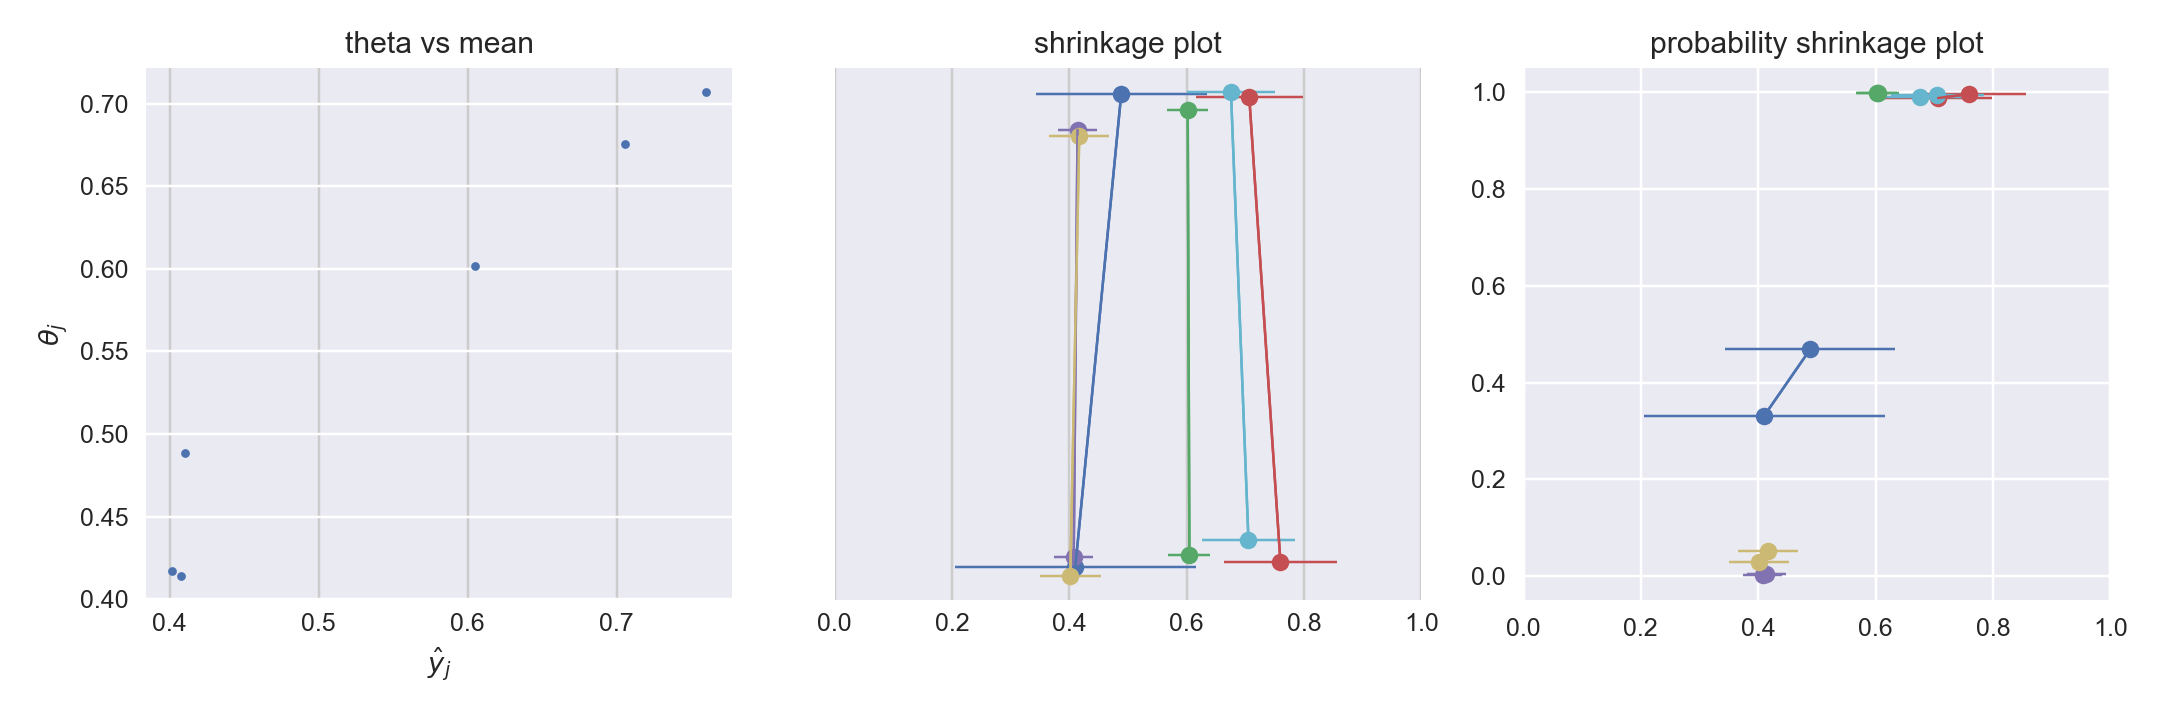

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 625.89it/s]
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
There were 35 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant qXOAl1zrwUufSGlUWGvA2A, topic 1: 


<IPython.core.display.Javascript object>


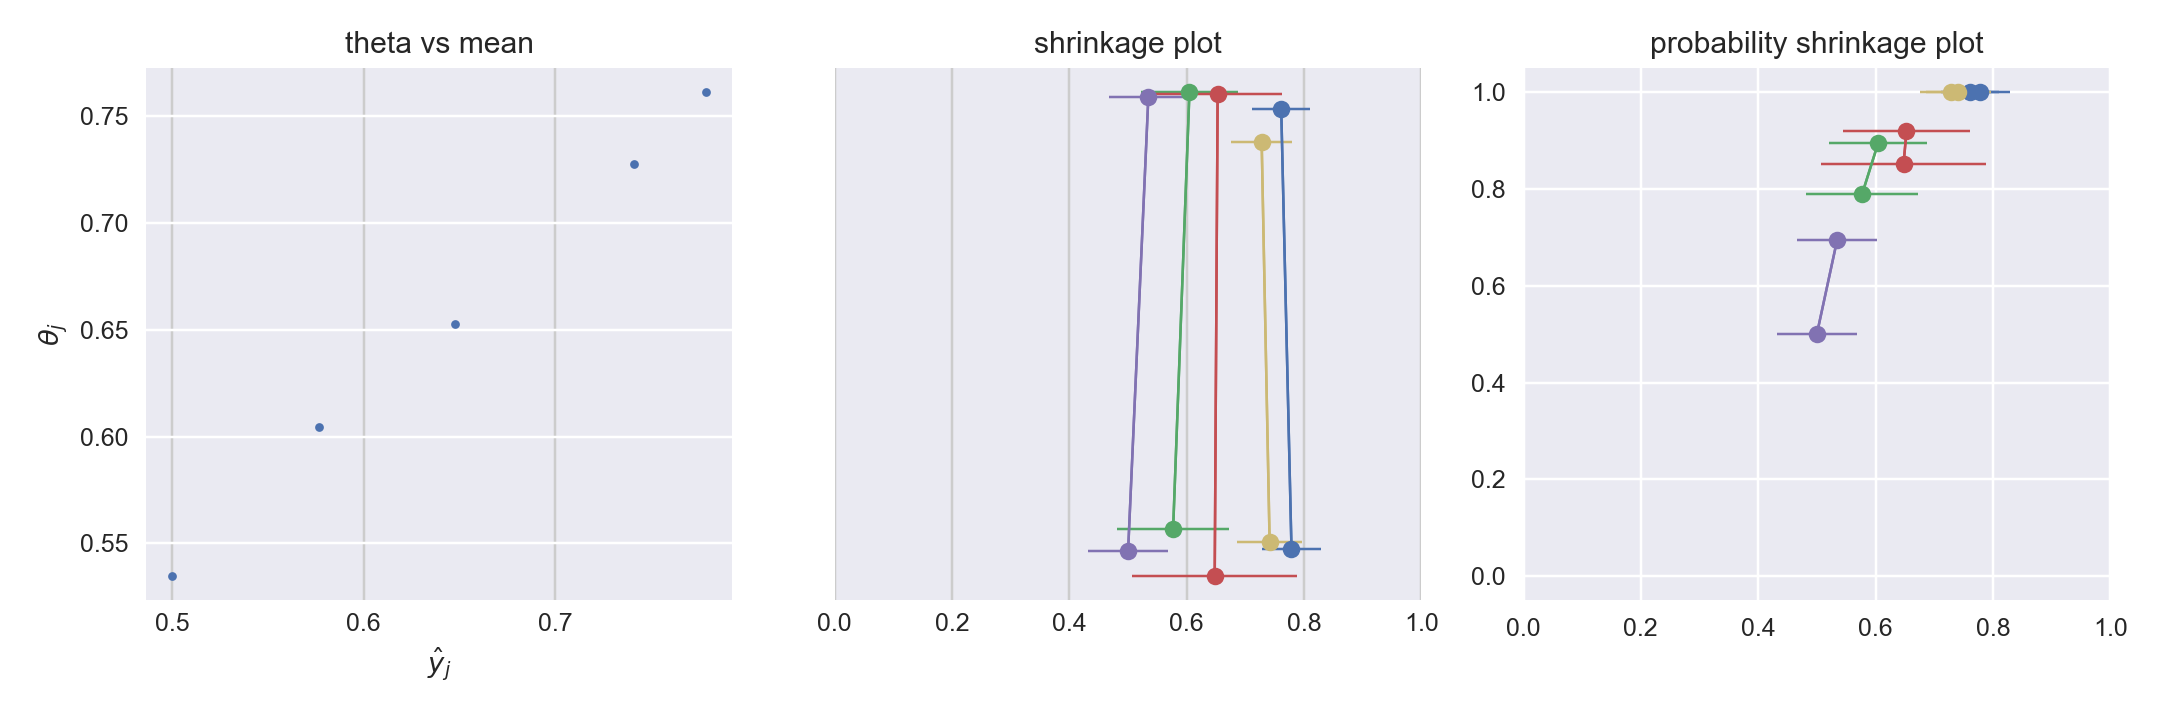

In [13]:
# Restaurant 0
rid = new_df['rid'].unique()[0]
model_restaurant(rid)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:10<00:00, 517.02it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant EJkiV-vOO2NfQH71KeqaXw, topic 0: 


<IPython.core.display.Javascript object>


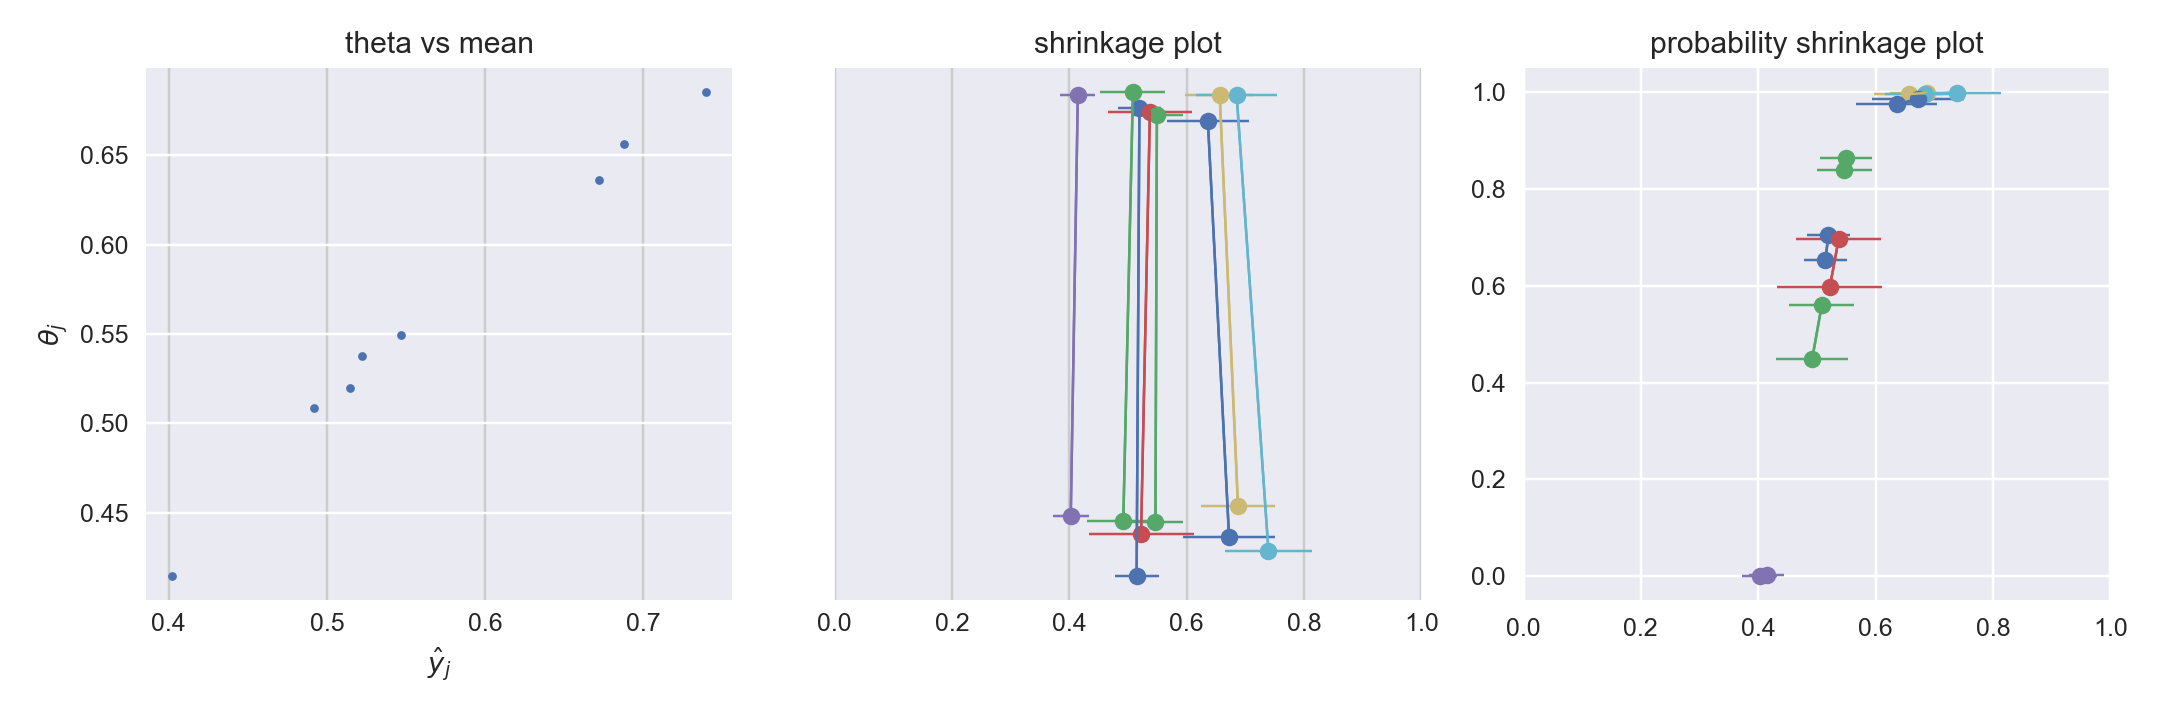

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 617.96it/s]
The acceptance probability does not match the target. It is 0.879877230682, but should be close to 0.8. Try to increase the number of tuning steps.


For restaurant EJkiV-vOO2NfQH71KeqaXw, topic 1: 


<IPython.core.display.Javascript object>


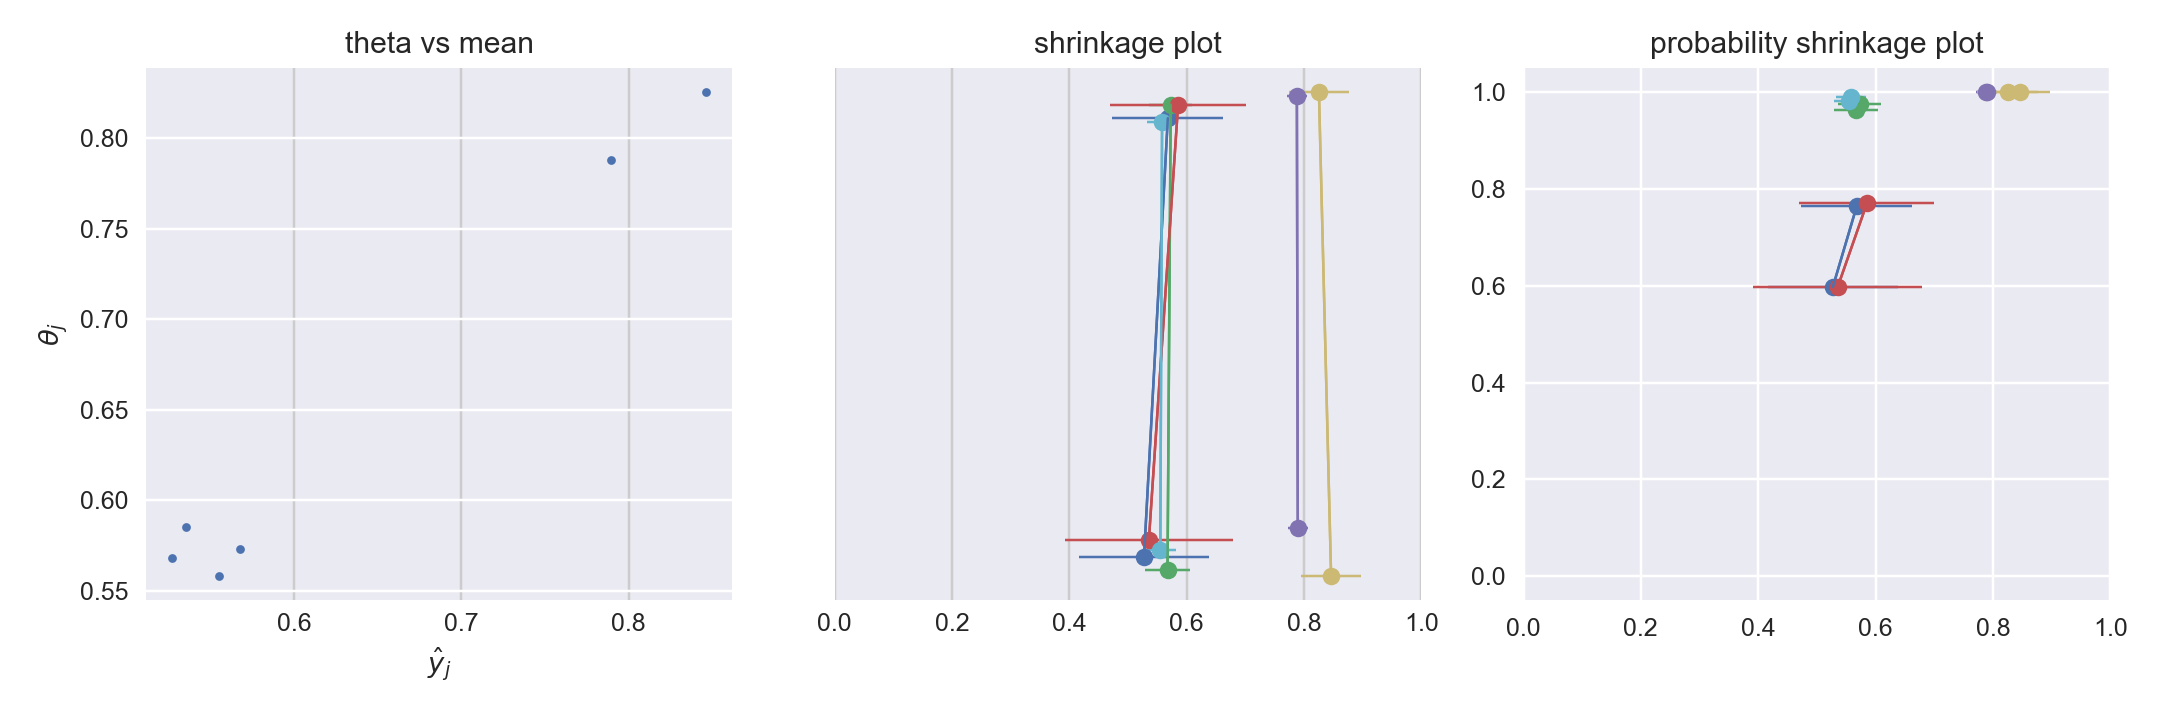

In [16]:
# Restaurant 1
rid = new_df['rid'].unique()[1]
model_restaurant(rid)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:09<00:00, 557.01it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant jhzF9VLnT7FZpvwPXSpApw, topic 0: 


<IPython.core.display.Javascript object>


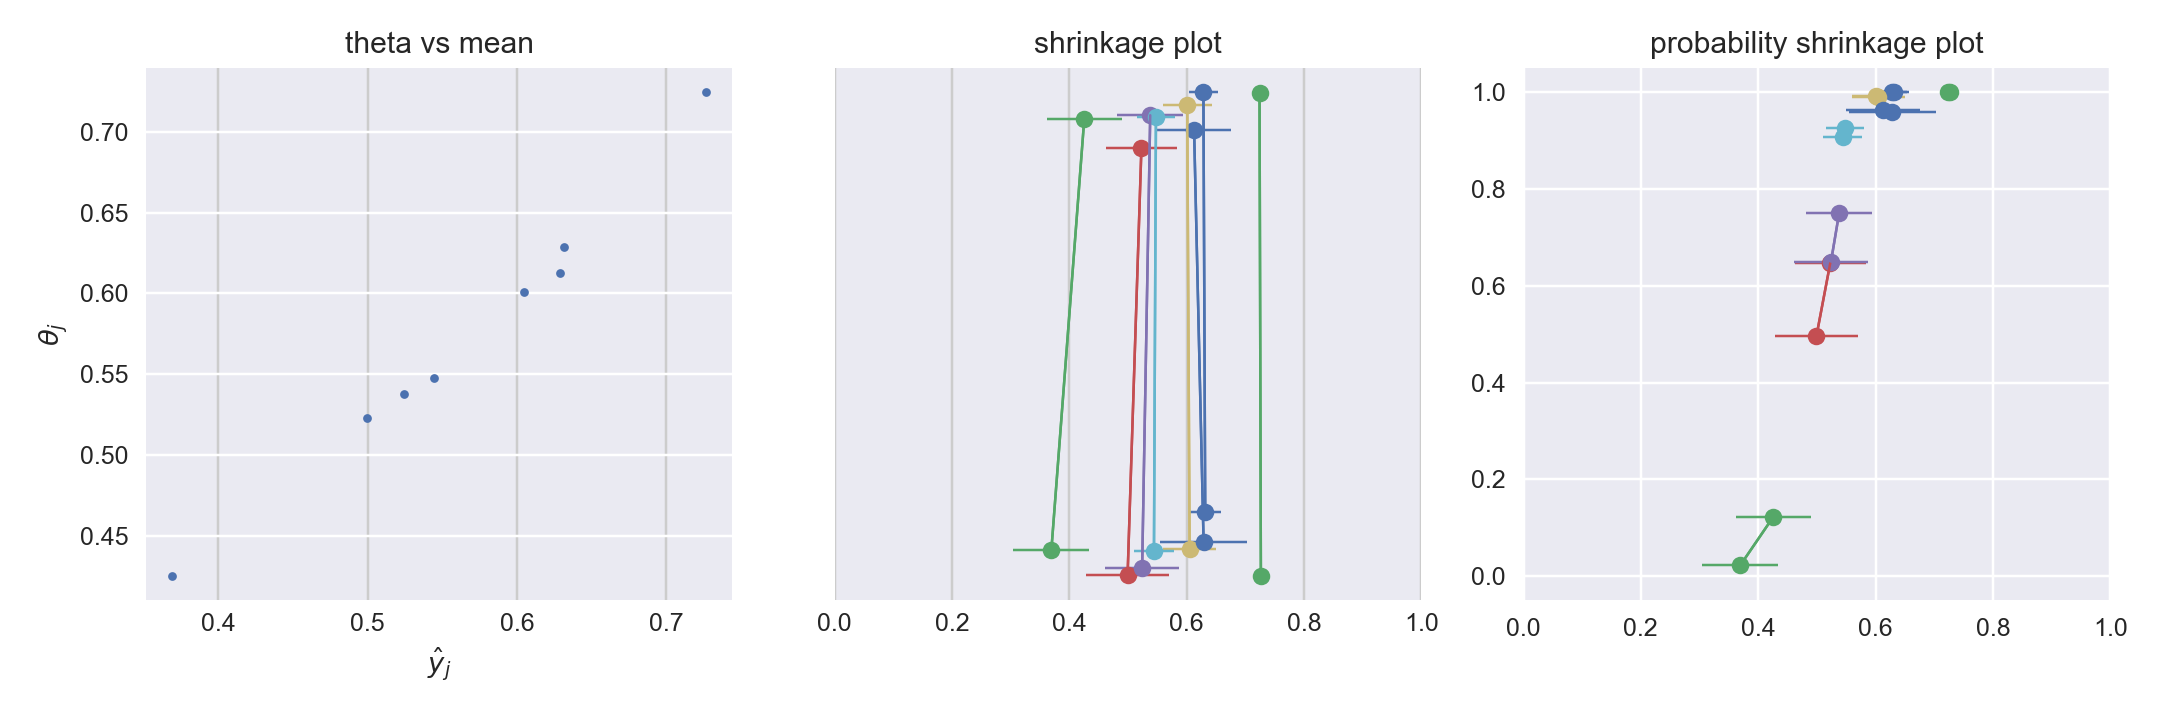

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 619.38it/s]
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


For restaurant jhzF9VLnT7FZpvwPXSpApw, topic 1: 


<IPython.core.display.Javascript object>


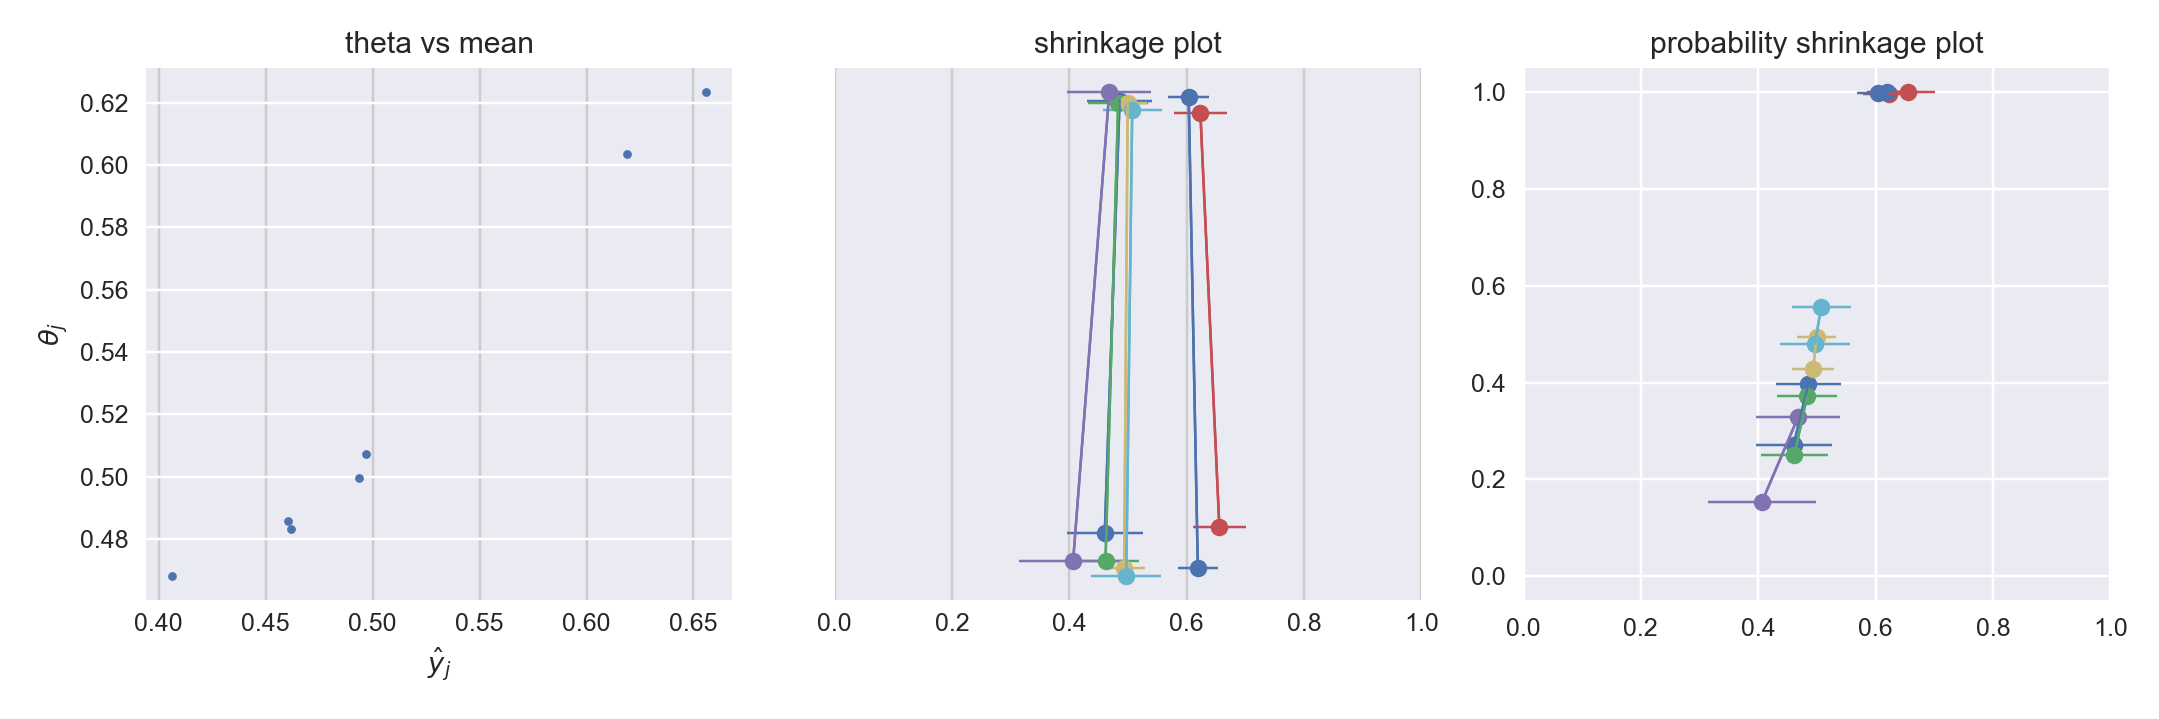

In [17]:
# Restaurant 2
rid = new_df['rid'].unique()[2]
model_restaurant(rid)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 686.86it/s]
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant XDYnLQC8ViZejuCDp4eCwg, topic 0: 


<IPython.core.display.Javascript object>


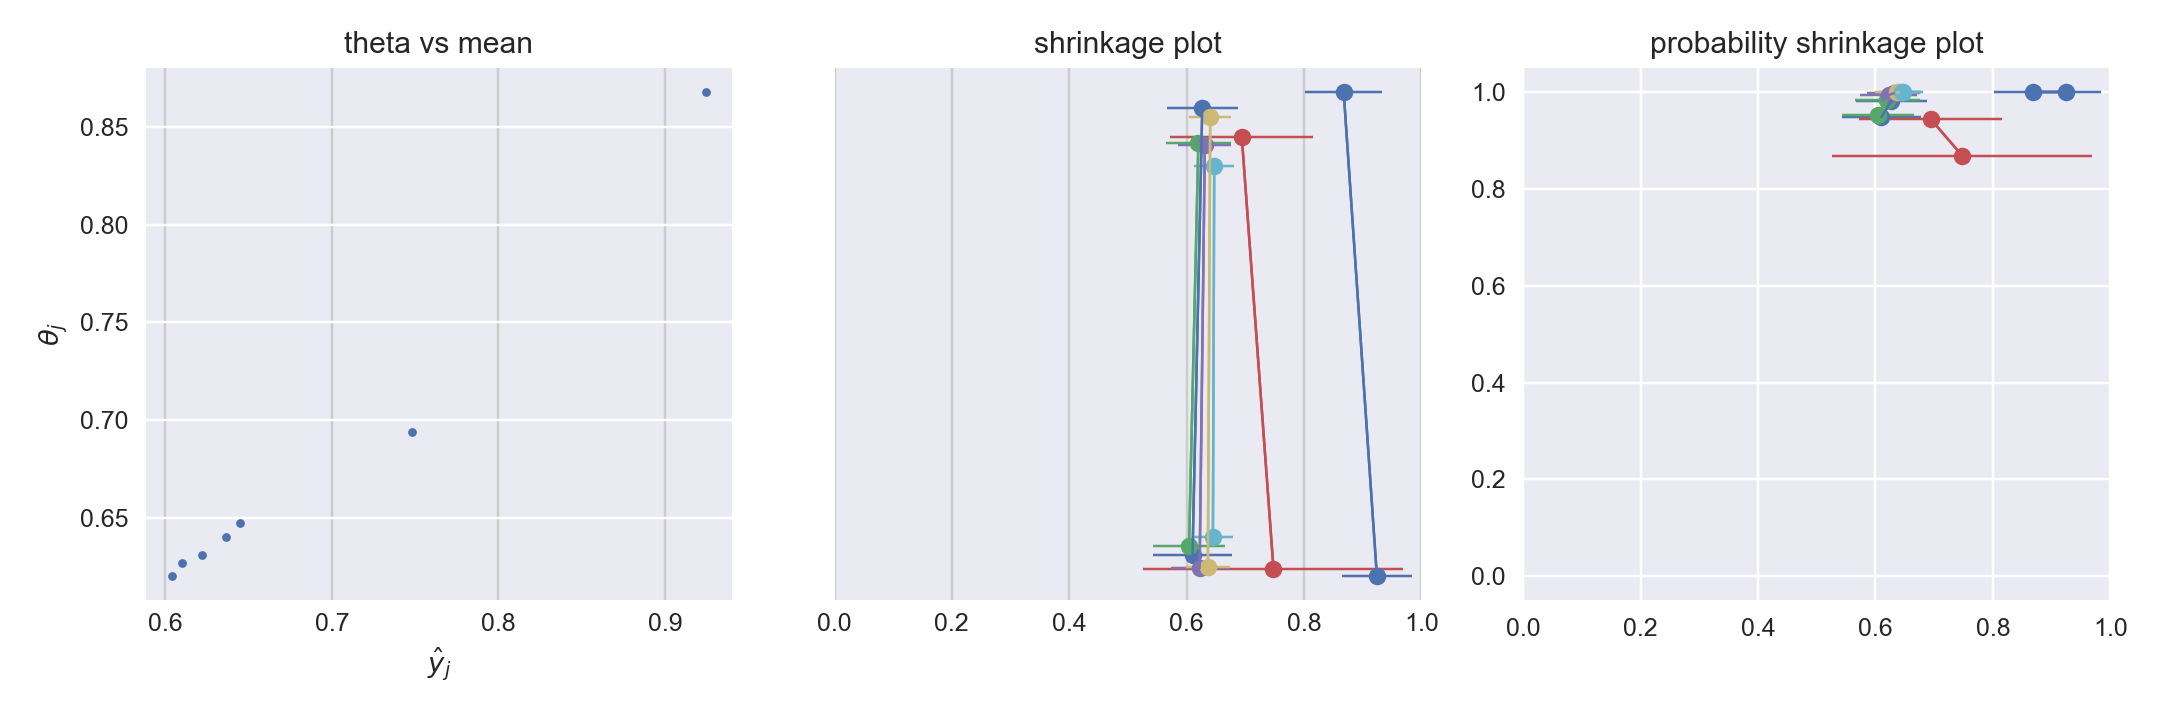

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:08<00:00, 661.72it/s]
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 399 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


For restaurant XDYnLQC8ViZejuCDp4eCwg, topic 1: 


<IPython.core.display.Javascript object>


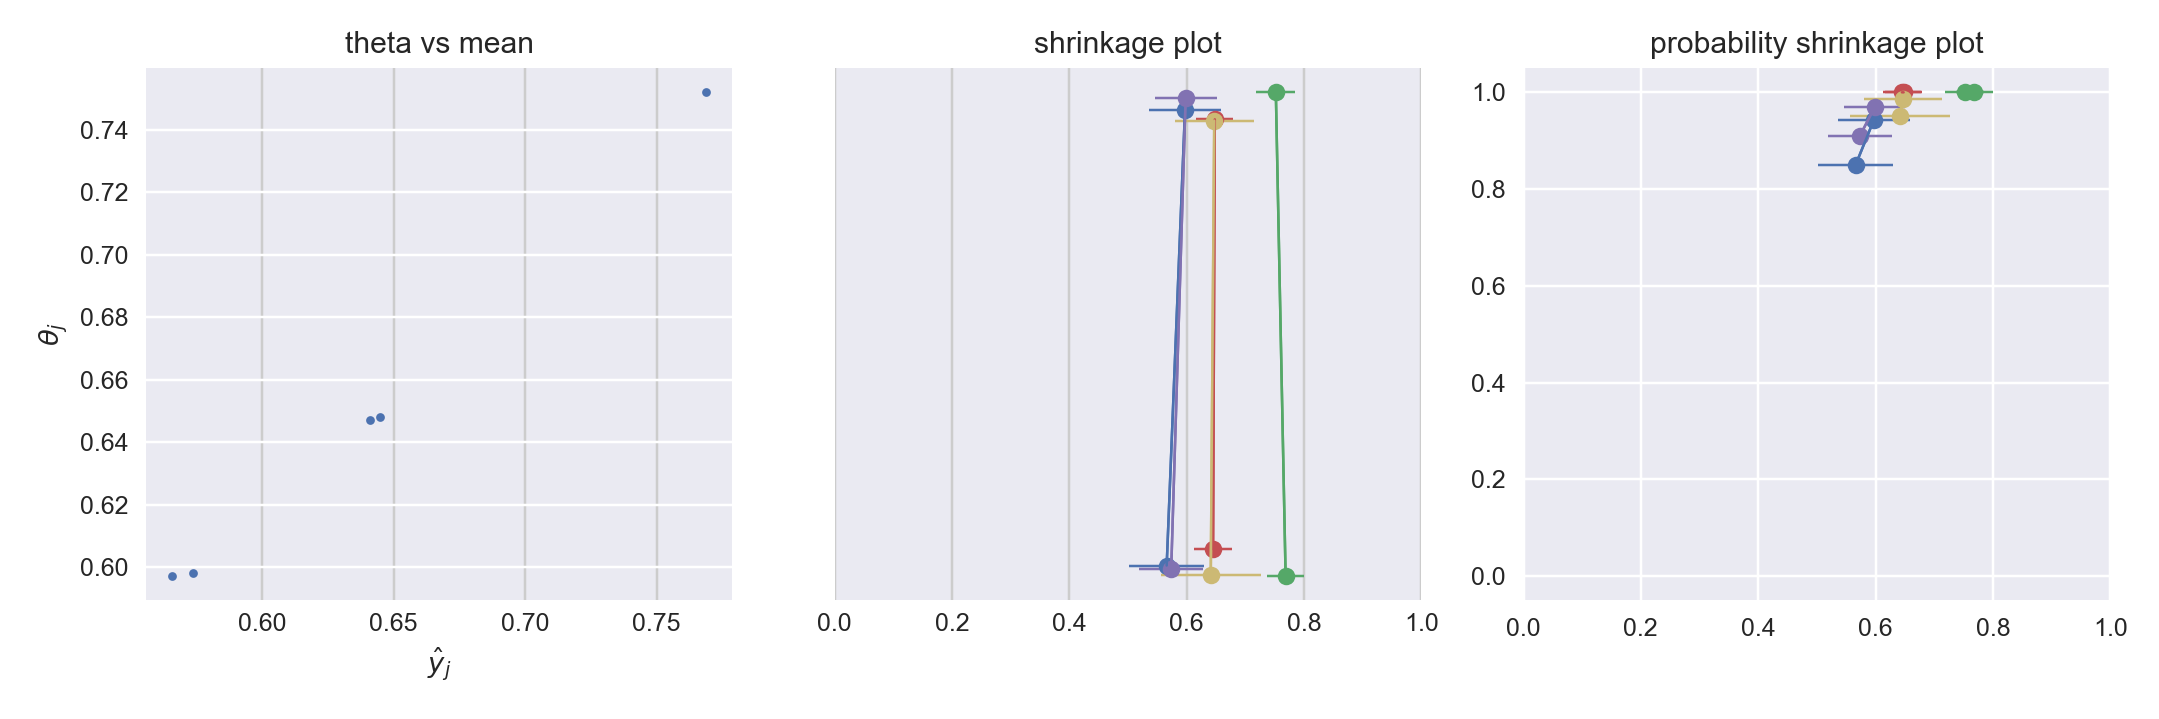

In [18]:
# Restaurant 3
rid = new_df['rid'].unique()[3]
model_restaurant(rid)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:09<00:00, 565.35it/s]


For restaurant 9r4gq8LVewal0uTnLiS1zQ, topic 0: 


<IPython.core.display.Javascript object>


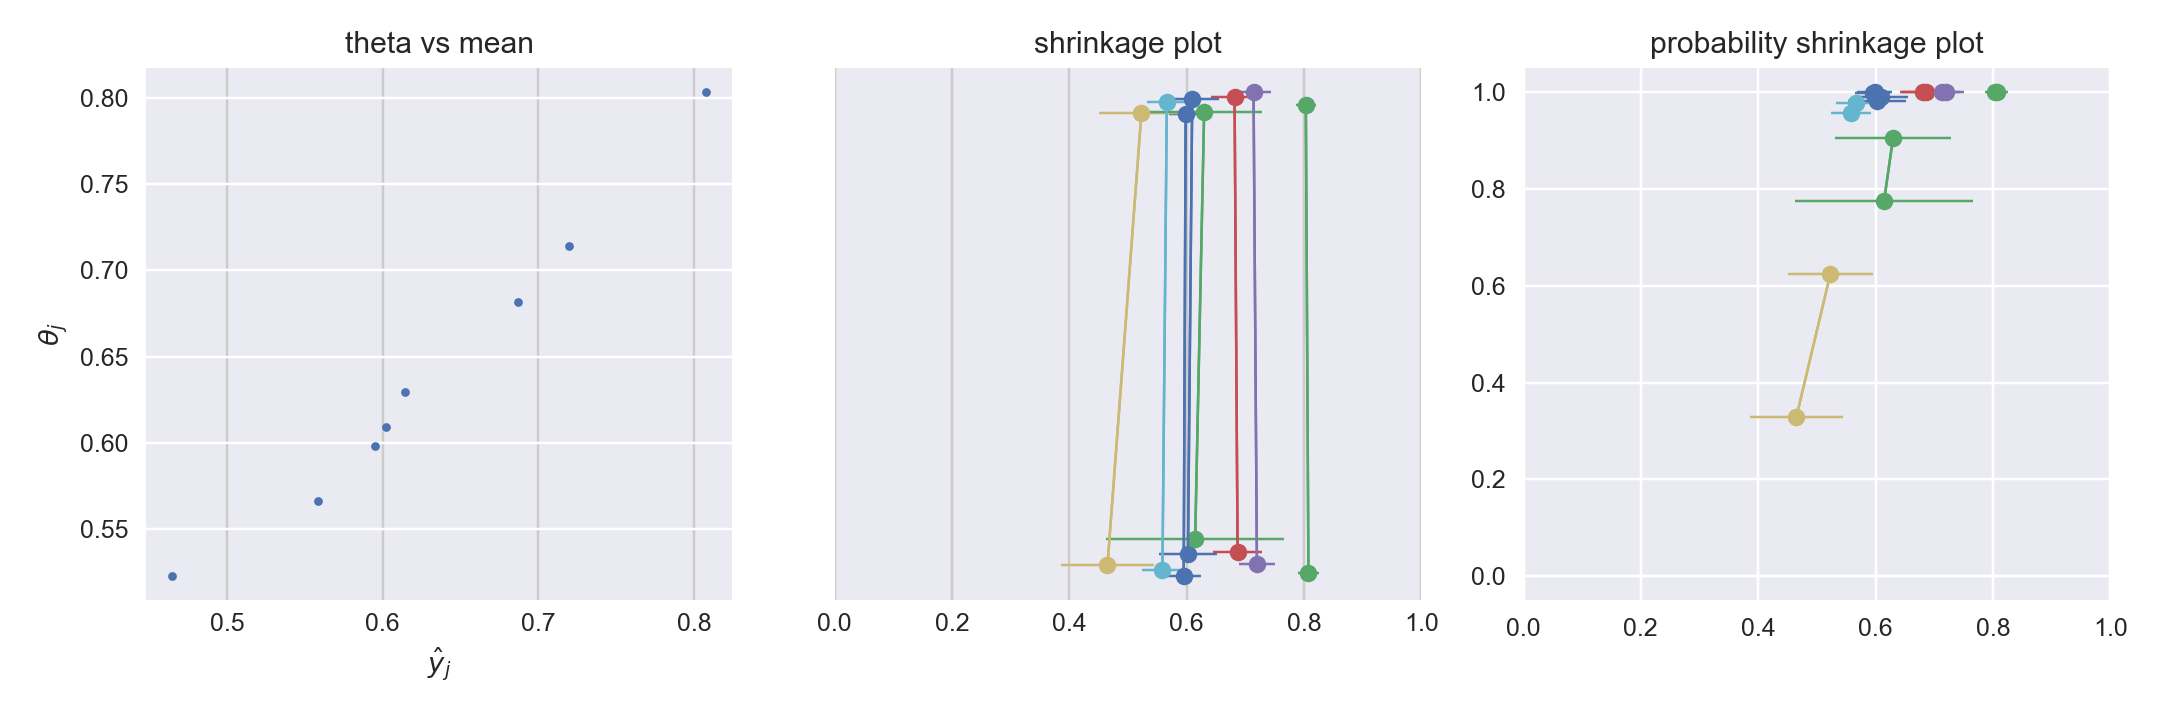

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, tau_log__, mu]
100%|██████████| 5500/5500 [00:09<00:00, 553.61it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


For restaurant 9r4gq8LVewal0uTnLiS1zQ, topic 1: 


<IPython.core.display.Javascript object>


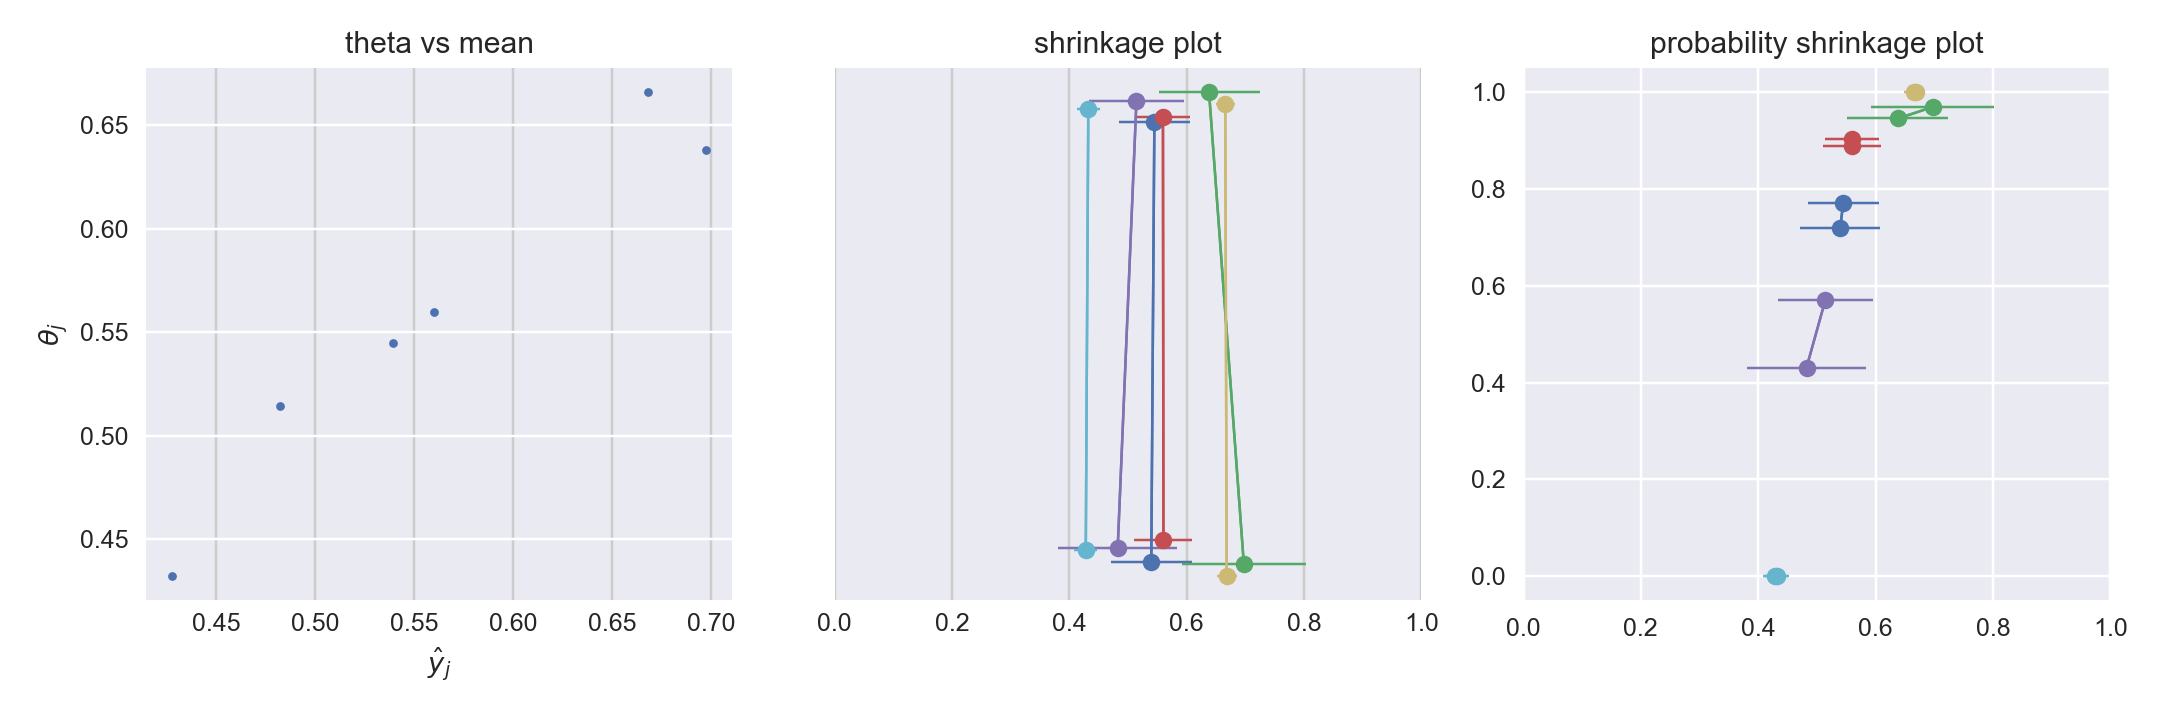

In [19]:
# Restaurant 4
rid = new_df['rid'].unique()[4]
model_restaurant(rid)

As shown above, we sampled the $\theta$'s and showed the shrinkage plots for five restaurants and for food and service topics for each restaurant. 

From the plots, we see that compared to approximating the reviewer's opinions with just the "mean" values, modeling each reviewer's opinion using the model from part A has a regularization effect over the reviews with various levels of uncertainty. Hence the analysis is more robust and realistic. 

***

### Part C: Analysis Across Restaurants

Aggregate, in a simple but reasonable way, the reviewer's opinions given a pair of overall scores for each restaurant -- one for food and one for service. Rank the restaurants by food score and then by service score. Discuss the statistical weakness of ranking by these scores.

(**Hint:** what is statistically problematic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? You've seen this question addressed a number of times in previous homeworks. This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)

***

### *Solution*

In [47]:
# Aggregate the reviewer's opinions by taking the mean of the thetas for each restaurant and each topic
overall_scores = new_df[new_df['rid'].isin(new_df['rid'].unique()[:5])]. \
                   groupby(['rid', 'topic'])[['theta']].mean()

In [51]:
# Rank the restaurants by food score
overall_scores.loc[(overall_scores.index.get_level_values('topic')==0)].sort_values(by=['theta'], ascending=False)

,,theta
rid,topic,
XDYnLQC8ViZejuCDp4eCwg,0,0.675388
9r4gq8LVewal0uTnLiS1zQ,0,0.640709
jhzF9VLnT7FZpvwPXSpApw,0,0.575048
EJkiV-vOO2NfQH71KeqaXw,0,0.563347
qXOAl1zrwUufSGlUWGvA2A,0,0.550583


In [52]:
# Rank the restaurants by service score 
overall_scores.loc[(overall_scores.index.get_level_values('topic')==1)].sort_values(by=['theta'], ascending=False)

,,theta
rid,topic,
qXOAl1zrwUufSGlUWGvA2A,1,0.656279
EJkiV-vOO2NfQH71KeqaXw,1,0.649604
XDYnLQC8ViZejuCDp4eCwg,1,0.648512
9r4gq8LVewal0uTnLiS1zQ,1,0.559213
jhzF9VLnT7FZpvwPXSpApw,1,0.524371


We choose to aggreate the reviewer's opnions by taking the mean of the $\theta_j$'s over all the reviews for each restaurant and each topic. The rankings of the five restaurants by food and service scores are given above. The problem of these rankings is that we did not take into account the variance of the $\theta_j$'s. 
***

### Extra Credit:

1. Propose a model addressing the weakness of your approach in Part C for the overall quality of food and service for each restaurant given the $\theta$'s. Combine your model for the overall quality with your model for the $\theta$'s. 
2. Implement and use this combined model to estimate the overall quality of food and service for each restaurant.

(Its perfectly ok to just propose and not implement, you'll just get less credit. But please atleast try part 1!)

***

### *Solution*

1. Just as how we deal with modeling each reviewer's opinion for a reastaurant and a topic, instead of approximating the overall quality by the "mean" of $\theta$'s, we propose a hierarchical model to model the overall quality of food (or service) for each restaurant. For example, let $\alpha_k^{\text{food}}$ be the overall quality of food for reastaurant $k$: 
$$\mu \sim \mathcal{N}(0,5)$$
$$\tau \sim \text{Half-Cauchy}(0,5)$$
$$\alpha_{k}^{\text{food}} \sim \mathcal{N}(\mu,\tau)$$
$$\hat{\theta}_{k}^{\text{food}} \sim \mathcal{N}(\alpha_{k}^{\text{food}},\sigma_{k}^{\text{food}})$$

***